# Lab 2, Part a

In this lab, you will

* Compare convective and radiative models to collected data
* Fit data to model

# Convective Heat Transfer

In Lab 1, we fit data from the TCLab to the model:

$$\tau_p \frac{dT}{dt} = (T_a - T) + K_p Q $$

We are going to replace the model with the following physics-based model:

$$m c_p \frac{dT}{dt} = UA(T_a-T) + \alpha Q $$

where $m = 0.004 \text{kg}$ is the weight of the heat sink being heated, $c_p = 500 \text{J/kg-K}$ is the heat capacity of the heat sink, $T_a = 23 ^{\circ}C$ is the ambient temperature, and $A=0.0012 \text{m}^2$ is the heat transfer area of the heat sink.

The model assumes that all heat loss is through natural convection with heat transfer coefficient $U=10\  W/(m^2 \cdot K)$ and the power output of the heater is controlled by the coefficient $\alpha=0.01 W/\%$.

Run an experiment for 10 minutes with the heater set to 50% power. Compare the temperature from the model prediction to the raw data from the TCLab unit. You can either solve the differential equation analytically or numerically.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import tclab
import time

n = 600  # Number of seconds (10 min)
tm = np.linspace(0,n,n+1) 

# data from TCL
lab = tclab.TCLab()
T1 = [lab.T1]
lab.Q1(50)
for i in range(n):
    time.sleep(1.0)
    print(lab.T1)
    T1.append(lab.T1)
lab.close()

# simulation for the TCL
def labsim(TC,t):
    U = 10.0
    A = 0.0012
    Cp = 500
    m = 0.004
    alpha = 0.01
    Ta = 23
    dTCdt = (U*A*(Ta-TC) + alpha*50)/(m*Cp)
    return dTCdt
Tsim = odeint(labsim,23,tm)


TCLab version 0.4.9
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.
25.217
25.088
25.378
25.281
25.475
25.41
25.217
25.539
25.539
25.571
25.732
25.894
26.216
26.151
26.184
26.377
26.377
26.506
26.538
26.796
26.828
27.054
27.086
27.183
27.183
27.505
27.666
27.795
27.892
27.827
28.053
28.343
28.343
28.697
28.762
28.794
29.052
29.277
29.277
29.567
29.793
29.89
29.986
29.825
30.341
30.309
30.405
30.405
30.856
30.921
31.05
31.05
31.308
31.372
31.662
31.662
31.662
31.984
31.92
32.307
32.274
32.468
32.597
32.693
32.919
32.951
33.209
33.306
33.402
33.596
33.563
33.563
33.95
34.144
34.079
34.401
34.176
34.498
34.563
34.627
34.917
34.756
35.014
35.207
35.11
35.4
35.497
35.465
35.884
35.852
35.948
36.174
36.142
36.271
36.496
36.528
36.593
36.689
36.883
36.979
36.979
37.076
37.366
37.398
37.302
37.56
37.753
37.817
37.882
38.172
38.107
38.236
38.462
38.397
38.397
38.591
38.688
38.784
39.074
38.978
39.042
39.01
39.139
39.268
39.396
39.3
39.751
39.

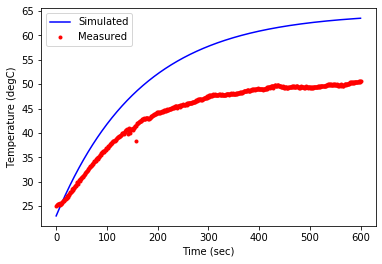

In [52]:
plt.figure(1)
plt.plot(tm,Tsim,'b-',label='Simulated')
plt.plot(tm,T1,'r.',label='Measured')
plt.ylabel('Temperature (degC)')
plt.xlabel('Time (sec)')
plt.legend()
plt.show()

# Radiative Heat Transfer

Models are just that: models. In reality, there are other ways heat is lost in our system. One other method we may wish to account for is radiative heat losses. We can update out model accordingly:

$$m c_p \frac{dT}{dt} = UA(T_a-T) + + \epsilon \sigma A (T_{\infty}^4 - T^4) \alpha Q $$

where $\epsilon=0.9$ is the emissivity coefficient and $\sigma=5.67 \cdot 10^{-8} W/m^2K^4$ is the Stefan-Boltzmann constant.

Solve the above differential equation and compare to the collected data from above and the convection-only model.

Does accounting for radiation change the model significantly? 

In [94]:
n = 600  # Number of second time points (10 min)

# collect data if TCLab is connected
try:
    lab = tclab.TCLab()
    T1 = [lab.T1]
    lab.Q1(50)
    for i in range(n):
        time.sleep(1)
        print(lab.T1)
        T1.append(lab.T1)
    lab.close()
    connected = True
except:
    print('Connect TCLab to Get Data')
    connected = False

# simulation
U = 5.0
A = 0.0012
alpha = 0.01
eps = 0.9
sigma = 5.67e-8
Ta = 23
Cp = 500
m = 0.004
TaK = Ta + 273.15
def labsim(TC,t):
    TK = TC + 273.15
    dTCdt = (U*A*(Ta-TC) + sigma*eps*A*(TaK**4-TK**4) + alpha*50)/(m*Cp)
    return dTCdt

tm = np.linspace(0,n,n+1) # Time values
Tsim = odeint(labsim,23,tm)

# calculate losses from conv and rad
conv = U*A*(Ta-Tsim)
rad = sigma*eps*A*(TaK**4-(Tsim+273.15)**4)
loss = conv+rad
gain = alpha*50


TCLab version 0.4.9
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.
28.504
28.472
28.568
28.568
28.568
28.729
28.697
28.697
28.633
28.826
28.504
28.762
28.923
29.116
29.374
29.406
29.406
29.567
29.729
29.793
29.922
30.051
30.051
30.244
30.341
30.566
30.728
30.824
31.018
31.05
31.34
31.533
31.662
31.759
31.888
31.984
32.178
32.274
32.307
32.661
32.822
32.983
33.112
33.209
33.241
33.467
33.692
33.854
33.95
34.208
34.24
34.498
34.53
34.82
34.82
35.014
35.11
35.175
35.368
35.529
35.755
35.787
35.98
36.109
36.271
36.496
36.528
36.754
36.883
36.979
37.076
37.173
37.431
37.463
37.624
37.785
37.753
37.946
38.107
38.172
38.333
38.43
38.526
38.72
38.752
38.913
39.01
39.171
39.139
39.332
39.396
39.687
39.719
39.912
40.009
40.138
40.299
40.331
40.428
40.589
40.653
40.911
41.008
40.976
41.362
41.362
41.362
41.652
41.652
41.685
41.878
41.91
42.039
42.232
42.232
42.361
42.394
42.522
42.684
42.813
42.813
42.941
43.006
42.974
43.231
43.264
43.231
43.

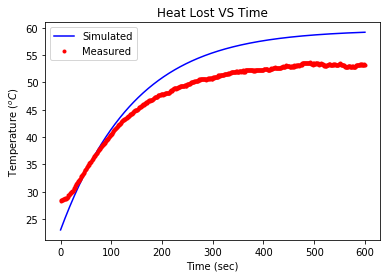

In [95]:
plt.figure(1)
plt.plot(tm,Tsim,'b-',label='Simulated')
if connected:
    plt.plot(tm,T1,'r.',label='Measured')
plt.ylabel(r'Temperature ($^oC$)')
plt.xlabel('Time (sec)')
plt.title('Heat Lost VS Time')
plt.legend()


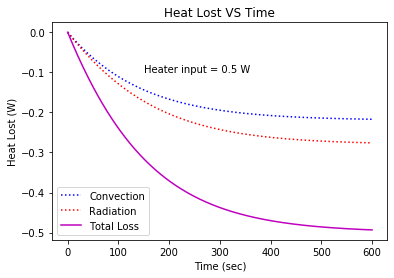

In [96]:
plt.plot(tm,conv,'b:',label='Convection')
plt.plot(tm,rad,'r:',label='Radiation')
plt.plot(tm,loss,'m-',label='Total Loss')
plt.text(150,-0.1,'Heater input = '+str(gain)+' W')
plt.ylabel(r'Heat Lost (W)')
plt.legend(loc=3)
plt.xlabel('Time (sec)')
plt.title('Heat Lost VS Time')
plt.show()

# Lab 2, Part b

In this lab, you will

* Convert between voltage signal, discrete levels and temperature for the temperature sensor.

The two temperature sensors on the TCLab are TMP36GZ thermistors (e.g. resistors with temperature-sensitive resistance) that report output voltage (mV) that is linearly proportional to temperature:

$$T ^{\circ}C = 0.1mV -50 $$

TMP36 sensor accuracy is $\pm 1^{\circ}C$ at $25^{\circ}C$ and $\pm 2^{\circ}C$ over the range $-40^{\circ}C$ to $150^{\circ}C$.

This is the equivalent of a **calibration curve** for the thermistor. You do not need to recalculate the calibration curve for each experiment using these types of sensors.

The mV is read on the Arduino with a 10-bit Analog to Digital Converter (ADC). There are $2^{10}$ discrete levels (DL) with a 10-bit ADC between 0 and 3300 mV. The Arduino reports a DL integer between 0 and 1023. This is converted to mV with $mV=DL \frac{3300}{1024}$. The following is a code segment from the firmware (C code) that is loaded on the Arduino:

```c
// Arduino code tclab.ino
const int pinT1   = 0;
const int pinT2   = 2;
float mV = 0.0;
float degC = 0.0;
for (int i = 0; i < n; i++) {
  mV = (float) analogRead(pinT1) * (3300.0/1024.0);
  degC = degC + (mV - 500.0)/10.0;
}
degC = degC / float(n);  
Serial.println(degC);
```

# Exercise 1:

Answer the following:

* What is the gain, zero, and span of the TMP36 thermistor?
* What mV signal corresponds to $25^{\circ}C$?
* What mV signal corresponds to $80^{\circ}C$?
* What temperature corresponds to a 0.5V signal?
* What temperature corresponds to a 1.2 V signal?
* Print the current temperature for $T_1$ and $T_2$ in Celsius and millivolts.

In [93]:
def T(mV):
    return round(0.1*mV-50.0,1)

def mV(T):
    return round((T+50.0)*10.0,2)

print('Part A')


KM = (2000 - 100) / (150 - (-40)) # mV / *C

print('Gain = ', KM)
print('Zero = ' , '-40 degrees Celcius =' + str(mV(-40)))

print('Span = ', '-40 degrees Celcius =' + str(mV(-40)), "[mV]",'to 150 degrees Celcius =' + str(mV(150)), "[mV]")


print(' ')

print('Part B')
print('mV at 25 degrees Celcius =' + str(mV(25)), "[mV]")

print(' ')

print('Part C')
print('mV at 80 degrees Celcius =' + str(mV(80)), "[mV]")

print(' ')

print('Part D')
print('Temperature at 0.5V =' + str(T(0.5*1000)), 'degrees Celcius')

print(' ')

print('Part E')
print('Temperature at 1.2V =' + str(T(1.2*1000)), 'degrees Celcius')

import tclab
lab = tclab.TCLab()
T1 = lab.T1
T2 = lab.T2
T1mV = (T1+50.0)*10.0
T2mV = (T2+50.0)*10.0

print('Part F')
print('T1 ='+str(T1)+' degrees Celcius')
print('T1 ='+str(round(T1mV))+' mV')
print('T2 ='+str(T2)+' degrees Celcius')
print('T2 ='+str(round(T2mV))+' mV')
lab.close()

Part A
Gain =  10.0
Zero =  -40 degrees Celcius =100.0
Span =  -40 degrees Celcius =100.0 [mV] to 150 degrees Celcius =2000.0 [mV]
 
Part B
mV at 25 degrees Celcius =750.0 [mV]
 
Part C
mV at 80 degrees Celcius =1300.0 [mV]
 
Part D
Temperature at 0.5V =0.0 degrees Celcius
 
Part E
Temperature at 1.2V =70.0 degrees Celcius
TCLab version 0.4.9
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.
Part F
T1 =28.343 degrees Celcius
T1 =783 mV
T2 =28.633 degrees Celcius
T2 =786 mV
TCLab disconnected successfully.


# Exercise 2:

A first-order process has a gain of $10^{\circ}C/\%$ and a lag constant of 45 s. The initial steady-state temperature is $50^{\circ}C$. Simulate a 5-minute unit step-change response to the system and plot the *exact* temperature. Temperature measurements are collected every second. As the temperature is being measured using a TMP36 thermistor, also plot the following:

* The discrete levels (DL) read by the Arduino (*integers only*).
* The mV output from the thermistor (*integers only*)
* The *measured* temperature (discrete values)

Calculate the mean squared error of the measured temperature values and the exact temperature values, the rounding error due to quantization.

Repeat the experiment with random noise added to your measurements with a scale of $1^{\circ}C$. Plot the exact and measured temperature, the DLs, and the voltage. Calculate the mean squared error and compare with the rounding error due to quantization.